<a href="https://colab.research.google.com/github/Zuhair0000/loan-approval-system/blob/main/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [122]:
data = fetch_openml(name='credit-g', version=1, as_frame=True, parser='auto')

In [123]:
df = data.frame
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


In [124]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [125]:
df['class'].value_counts()

,count
class,
good,700
bad,300


In [126]:
X = df.drop('class', axis=1)
y = df['class']

In [127]:
y = df['class'].map({'good': 0, 'bad': 1})
# Do this BEFORE train_test_split!

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing

In [129]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [130]:
categorical_columns = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()

In [131]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_columns)
])

# **Model Training**

## Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

lr = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(class_weight='balanced', random_state=42))
])

lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job',
                                                   'own_telephone',
                                                   'foreign_worker'])])),
                ('model',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [147]:
lr_pred = lr.predict(X_test)

## Random Forest

In [148]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, criterion='entropy', class_weight='balanced', random_state=42))
])

rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'installment_commitment',
                                                   'residence_since', 'age',
                                                   'existing_credits',
                                                   'num_dependents']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['checking_status',
                                                   'credit_history', 'purpose',
                                                   'savings_status',
                                                   'employment',
                                                   'personal_status',
                                                   'other_parties',
                                                   'property_magnitude',
                                                   'other_payment_plans',
                                                   'housing', 'job',
                                                   'own_telephone',
                                                   'foreign_worker'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', n_estimators=200,
                                        random_state=42))])

In [149]:
rf_pred = rf.predict(X_test)

# **Evaluation**

In [137]:
from sklearn.metrics import(
    accuracy_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
    )

In [143]:
def evaluate_model(y_pred, y_test, model_name="Model"):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("="*40)

In [150]:
evaluate_model(lr_pred, y_test, "Logistic Regression")

--- Logistic Regression ---
Accuracy: 0.7500
F1 Score: 0.6575
Confusion Matrix:
 [[102  38]
 [ 12  48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80       140
           1       0.56      0.80      0.66        60

    accuracy                           0.75       200
   macro avg       0.73      0.76      0.73       200
weighted avg       0.79      0.75      0.76       200



In [151]:
evaluate_model(rf_pred, y_test, "Random Forest")

--- Random Forest ---
Accuracy: 0.7750
F1 Score: 0.5361
Confusion Matrix:
 [[129  11]
 [ 34  26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       140
           1       0.70      0.43      0.54        60

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.69       200
weighted avg       0.76      0.78      0.76       200



# Model Explainability

In [152]:
import seaborn as sns

trained_model = lr.named_steps['model']
trained_preprocessor = lr.named_steps['preprocessor']

In [153]:
coefficient = trained_model.coef_[0]

In [159]:
feature_names = trained_preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficient
})

In [160]:
importance_df['Abs_Weight'] = importance_df['Weight'].abs()
importance_df = importance_df.sort_values(by='Abs_Weight', ascending=False).head(10)

/tmp/ipython-input-1789243195.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weight', y='Feature', data=importance_df, palette='coolwarm')


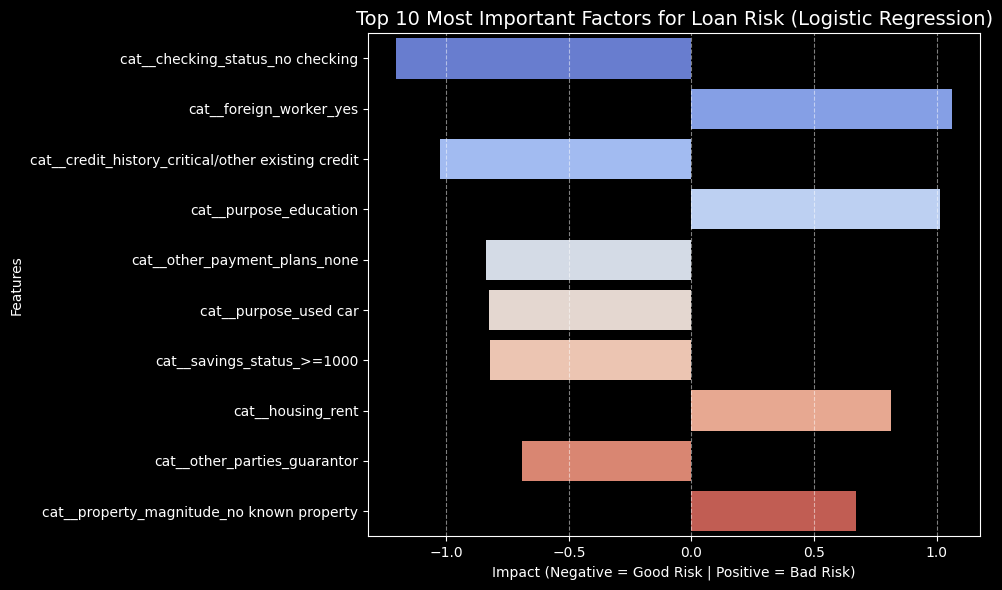

In [161]:
plt.figure(figsize=(10, 6))
plt.style.use('dark_background') # Giving it that modern terminal vibe
sns.barplot(x='Weight', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Top 10 Most Important Factors for Loan Risk (Logistic Regression)', fontsize=14)
plt.xlabel('Impact (Negative = Good Risk | Positive = Bad Risk)')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Save Model

In [162]:
import joblib
joblib.dump(lr, 'loan_risk_model.pkl')

['loan_risk_model.pkl']